In [47]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.decomposition import PCA


from sklearn import model_selection as md
from tensorflow.keras.datasets import mnist



In [48]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = np.reshape(x_train,(-1,784))
x_test = np.reshape(x_test,(-1,784))

inpT = np.concatenate((x_train,x_test))
tarT = np.concatenate((y_train,y_test))
print (np.shape(inpT))

(70000, 784)


In [49]:
c_noise=0

noise_tr=np.random.rand(len(inpT),784)*c_noise


inpT= inpT/255.


inpT=(inpT+noise_tr)/(1+c_noise)


In [50]:
from sklearn.model_selection import train_test_split
inp_tr, inp_va, tar_tr, tar_va = train_test_split( inpT, tarT, test_size=0.3, random_state=0)
print (np.shape(tar_tr),np.shape(tar_va))

(49000,) (21000,)


In [51]:
pca = PCA(784)   ## the percentage 

#n_components=700

#pca=PCA(n_components=n_components, copy=True, whiten=False, svd_solver='auto', iterated_power='auto', random_state=None)
pca.fit(inp_tr)
inp_tr_pca = pca.transform(inp_tr)
inp_va_pca = pca.transform(inp_va)

<Figure size 640x480 with 0 Axes>

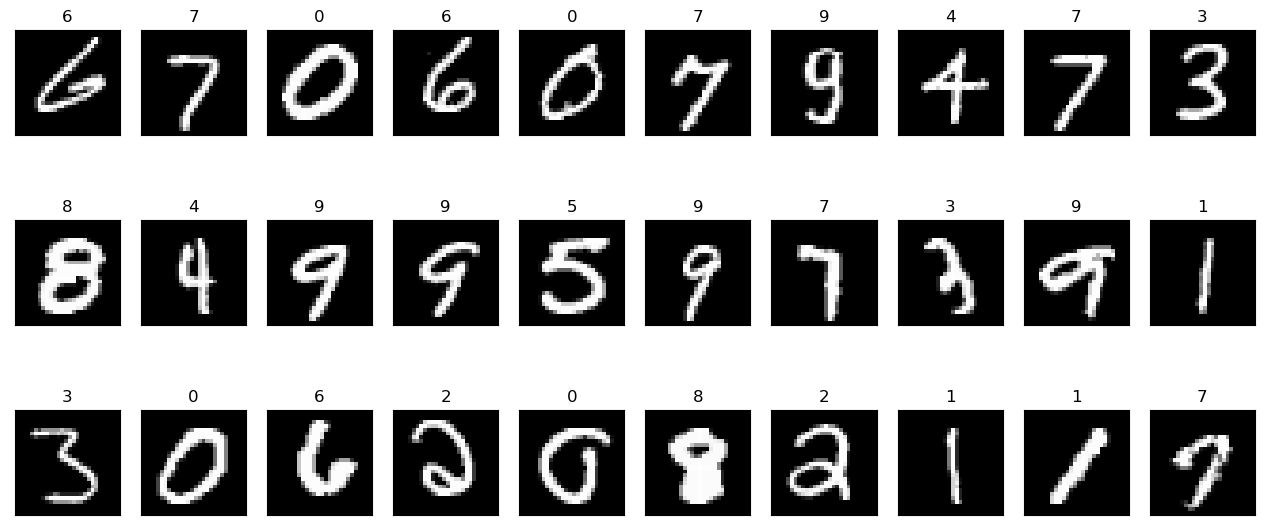

In [52]:
n1=0
n2=30



# Plot the graph
plt.gray()
fig = plt.figure( figsize=(16,7) )
for k1 in range(n1,n2):
    ax = fig.add_subplot(3,10,k1+1, title=str(int(tar_tr[k1])))
    ax.matshow(inp_tr[k1].reshape((28,28)).astype(float))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

In [53]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(penalty='l2',verbose=1)

import time
start = time.time()

# logisticRegr.fit(inp_tr, tar_tr)
# logisticRegr.predict(inp_va)




logisticRegr.fit(inp_tr_pca, tar_tr)
pred_tr= logisticRegr.predict(inp_tr_pca)
pred_va= logisticRegr.predict(inp_va_pca)







end = time.time()
time_taken = end - start
print ('Time regression: ',time_taken)

print  ('-----------------------------')

print ('Score train', logisticRegr.score(inp_tr_pca, tar_tr))
print ('Score test', logisticRegr.score(inp_va_pca,tar_va))




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Karlee\miniconda3\envs\phys555\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   14.4s finished


Time regression:  14.766514778137207
-----------------------------
Score train 0.9415510204081633
Score test 0.9171904761904762


Confusion matrix, without normalization
[[2010    0   12    7    4   19   13    3   10    8]
 [   0 2331   24   11    5   10    7   12   49    9]
 [   6   12 1899   50   12   17   20   25   25    9]
 [   4    6   28 1867    6   55    3    4   49   23]
 [   2    2   32    1 1860   23   20   20   12   72]
 [  23    9    6   85    2 1655   35    6   65   24]
 [  21    2   21    5   26   34 1934    0   19    1]
 [   2    4   19   21   18   10    4 2028    3   68]
 [   6   16   66   44   12   62    9    9 1779   14]
 [   3    3    8   26   59   15    0   82   31 1898]]


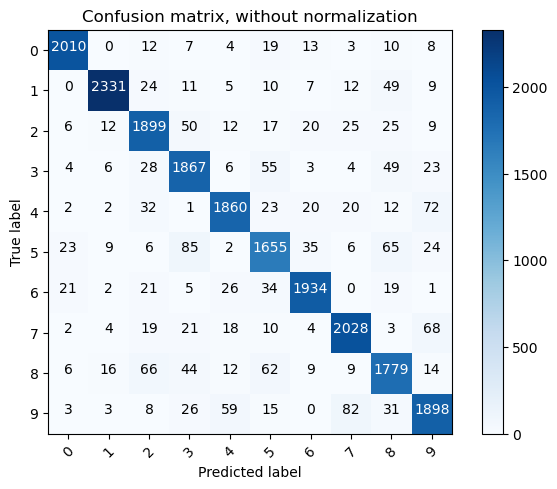

Normalized confusion matrix
[[9.64e-01 0.00e+00 5.75e-03 3.36e-03 1.92e-03 9.11e-03 6.23e-03 1.44e-03
  4.79e-03 3.84e-03]
 [0.00e+00 9.48e-01 9.76e-03 4.48e-03 2.03e-03 4.07e-03 2.85e-03 4.88e-03
  1.99e-02 3.66e-03]
 [2.89e-03 5.78e-03 9.15e-01 2.41e-02 5.78e-03 8.19e-03 9.64e-03 1.20e-02
  1.20e-02 4.34e-03]
 [1.96e-03 2.93e-03 1.37e-02 9.13e-01 2.93e-03 2.69e-02 1.47e-03 1.96e-03
  2.40e-02 1.12e-02]
 [9.78e-04 9.78e-04 1.57e-02 4.89e-04 9.10e-01 1.13e-02 9.78e-03 9.78e-03
  5.87e-03 3.52e-02]
 [1.20e-02 4.71e-03 3.14e-03 4.45e-02 1.05e-03 8.66e-01 1.83e-02 3.14e-03
  3.40e-02 1.26e-02]
 [1.02e-02 9.69e-04 1.02e-02 2.42e-03 1.26e-02 1.65e-02 9.37e-01 0.00e+00
  9.21e-03 4.85e-04]
 [9.19e-04 1.84e-03 8.73e-03 9.65e-03 8.27e-03 4.59e-03 1.84e-03 9.32e-01
  1.38e-03 3.12e-02]
 [2.97e-03 7.93e-03 3.27e-02 2.18e-02 5.95e-03 3.07e-02 4.46e-03 4.46e-03
  8.82e-01 6.94e-03]
 [1.41e-03 1.41e-03 3.76e-03 1.22e-02 2.78e-02 7.06e-03 0.00e+00 3.86e-02
  1.46e-02 8.93e-01]]


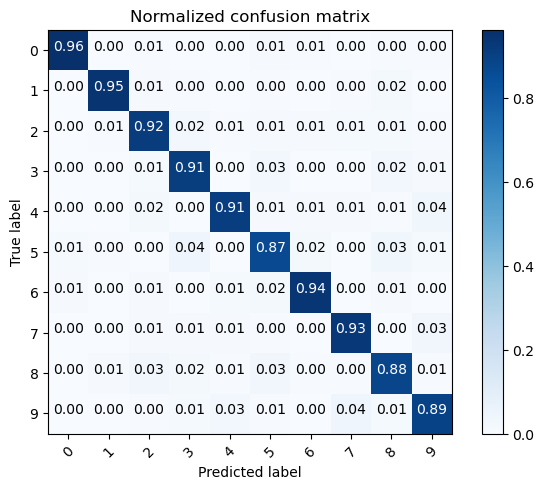

In [54]:
import itertools
import numpy as np
import matplotlib.pyplot as plt


from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix



def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Compute confusion matrix
cnf_matrix = confusion_matrix(pred_va, tar_va)
np.set_printoptions(precision=2)

#Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0','1', '2','3','4','5','6','7','8','9'],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0','1', '2','3','4','5','6','7','8','9'], normalize=True,
                      title='Normalized confusion matrix')

#plt.show()




In [55]:
from sklearn import datasets, metrics
print ("Accuracy (TR) = ", metrics.accuracy_score(pred_va, tar_va))

Accuracy (TR) =  0.9171904761904762
